In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# time_domian_features = pd.read_json("C:/uoft/Meng_project/bearings-project-meng/Streamlit/outputs/Gold/time_domain_features.jsonl", lines=True)
# freq_domian_features = pd.read_json("C:/uoft/Meng_project/bearings-project-meng/Streamlit/outputs/Gold/frequency_domain_features.jsonl", lines=True)
# time_freq_domian_features = pd.read_json("C:/uoft/Meng_project/bearings-project-meng/Streamlit/outputs/Gold/time_frequency_features.jsonl", lines=True)
#merge the three pds using timsstamp
# cleaned_df = pd.merge(time_domian_features, freq_domian_features, on='timestamp')
# cleaned_df = pd.merge(cleaned_df, time_freq_domian_features, on='timestamp')
cleaned_df=pd.read_json("C:/uoft/Meng_project/bearings-project-meng/Streamlit/outputs/Gold/frequency_domain_features.jsonl", lines=True)

display(cleaned_df.tail())


,identifier,bearing,Millisec,timestamp,channel_x,channel_y,split_Bearing1,split_Bearing2,split_Bearing3,channel_x_z_scores,...,channel_y_fft_max,channel_y_spectral_centroid,channel_y_spectral_bandwidth,channel_y_amplitude_envelope,channel_y_phase_envelope,channel_y_log_power_spectrum,channel_y_cepstrum,channel_y_cepstrum_mean,channel_y_cepstrum_std,channel_y_cepstrum_max
5892,Bearing3_1,0,"[118830.0, 118870.0, 118910.0, 118940.0, 11898...",10:35:39,"[1.6640407346, 0.5667428007, 1.347154015300000...","[-1.9786911265, 0.35900313370000003, -0.878802...",False,False,True,"[1.6640407346, 0.5667428007, 1.347154015300000...",...,210.196799,6774.797137,3189.864075,"[2.1952417682, 1.047648955, 1.0016057374, 2.04...","[-2.6936834005, -1.2210334755, 2.6411987893999...","[-23.0258509299, 1.3169556864, 3.1236430426, 4...","[6.8024725192, 0.5190023463, 0.4458860676, 0.3...",0.034746,0.192466,6.802473
5893,Bearing3_1,0,"[118830.0, 118870.0, 118910.0, 118940.0, 11898...",10:35:49,"[-1.546225706, -2.1813333254, 0.2695935689, 0....","[1.0928070118, 1.7943153581, -0.4784631334, -0...",False,False,True,"[-1.546225706, -2.1813333254, 0.2695935689, 0....",...,194.668748,6814.635579,3138.390901,"[1.6160817996999999, 2.0785487187, 1.952124822...","[-0.8281934961, 0.5291153878, 1.8184177584, -3...","[-23.0258509299, 2.7578323037, 4.3041983114, 3...","[6.7434202373000005, 0.5973328553, 0.497953404...",0.035052,0.191263,6.743420
5894,Bearing3_1,0,"[118830.0, 118870.0, 118910.0, 118940.0, 11898...",10:35:59,"[0.2871531724, 1.7585206952, 0.044502424900000...","[-0.9029803534, 0.9320588609, -0.4090843221, 0...",False,False,True,"[0.2871531724, 1.7585206952, 0.044502424900000...",...,231.641611,6859.278066,3168.941987,"[1.7145985242, 0.9928467954, 0.4224816981, 0.7...","[-2.125442373, -0.3517415813, 2.8890845522, -1...","[-23.0258509299, 2.5958515664, 3.9098638816999...","[6.7055704391, 0.5461154358, 0.539725396400000...",0.035405,0.190274,6.705570
5895,Bearing3_1,0,"[118830.0, 118870.0, 118910.0, 118940.0, 11898...",10:36:9,"[-0.28293820340000003, -0.5982769156000001, -0...","[-0.3399382747, 1.2174766217, 1.0451282886, -0...",False,False,True,"[-0.28293820340000003, -0.5982769156000001, -0...",...,197.459326,6848.627202,3178.902864,"[1.2726215522, 1.4916035772, 1.4690367588, 1.1...","[-1.8411959359, -0.6159586569000001, 0.7792542...","[-23.0258509299, 1.9042717833, 3.931411635, 4....","[6.7630870755, 0.553696465, 0.4898614909000000...",0.035415,0.191437,6.763087
5896,Bearing3_1,0,"[118830.0, 118870.0, 118910.0, 118940.0, 11898...",10:36:19,"[0.6077895987, 0.3428133424, 1.1225672596, 0.3...","[-0.6662215509, -0.1039026277, 1.3095123012, -...",False,False,True,"[0.6077895987, 0.3428133424, 1.1225672596, 0.3...",...,240.352248,6804.803159,3161.135345,"[0.7353729632, 1.4395690458, 1.3383090621, 0.7...","[2.7044479637, -1.6430353430000002, 0.20782148...","[-23.0258509299, 4.6083266909, 4.1472712564, 3...","[6.7762382774, 0.5921252174, 0.4950127681, 0.2...",0.035422,0.192014,6.776238


### Using tabular data to find anomalies

In [10]:
#print all unique identifiers
print(cleaned_df.columns)



Index(['identifier', 'bearing', 'Millisec', 'timestamp', 'channel_x',
       'channel_y', 'split_Bearing1', 'split_Bearing2', 'split_Bearing3',
       'channel_x_z_scores', 'channel_x_anomalies', 'channel_y_z_scores',
       'channel_y_anomalies', 'channel_x_fft_magnitude', 'channel_x_fft_phase',
       'channel_x_fft_freq', 'channel_x_power_spectrum', 'channel_x_fft_mean',
       'channel_x_fft_std', 'channel_x_fft_max', 'channel_x_spectral_centroid',
       'channel_x_spectral_bandwidth', 'channel_x_amplitude_envelope',
       'channel_x_phase_envelope', 'channel_x_log_power_spectrum',
       'channel_x_cepstrum', 'channel_x_cepstrum_mean',
       'channel_x_cepstrum_std', 'channel_x_cepstrum_max',
       'channel_y_fft_magnitude', 'channel_y_fft_phase', 'channel_y_fft_freq',
       'channel_y_power_spectrum', 'channel_y_fft_mean', 'channel_y_fft_std',
       'channel_y_fft_max', 'channel_y_spectral_centroid',
       'channel_y_spectral_bandwidth', 'channel_y_amplitude_envelope',
   

In [11]:
#get the timestamps for each bearing
bearing1_timestamps = cleaned_df[cleaned_df['identifier'] == 'Bearing1_1']['timestamp']
#print timestamp data type
print(bearing1_timestamps.dtypes)

bearing2_timestamps = cleaned_df[cleaned_df['identifier'] == 'Bearing1_2']['timestamp']
bearing3_timestamps = cleaned_df[cleaned_df['identifier'] == 'Bearing2_1']['timestamp']
bearing4_timestamps = cleaned_df[cleaned_df['identifier'] == 'Bearing2_2']['timestamp']
bearing5_timestamps = cleaned_df[cleaned_df['identifier'] == 'Bearing3_1']['timestamp']
df = cleaned_df.drop(cleaned_df.columns[1:13], axis=1)



bearing1 = df[df['identifier'] == 'Bearing1_1']
bearing1.drop(['identifier'], axis=1, inplace=True)


bearing2 = df[df['identifier'] == 'Bearing1_2']
bearing2.drop(['identifier'], axis=1, inplace=True)

bearing3 = df[df['identifier'] == 'Bearing2_1']
bearing3.drop(['identifier'], axis=1, inplace=True)


bearing4 = df[df['identifier'] == 'Bearing2_2']
bearing4.drop(['identifier'], axis=1, inplace=True)


bearing5 = df[df['identifier'] == 'Bearing3_1']
bearing5.drop(['identifier'], axis=1, inplace=True)



print(bearing1.shape)

# x is first 12 columns and y is the last 12 column
bearing1_channelx_df = bearing1[bearing1.columns[0:15]]
bearing1_channelx_df['timestamp'] = bearing1_timestamps
display(bearing1_channelx_df.head())
bearing1_channely_df = bearing1[bearing1.columns[16:32]]
bearing1_channely_df['timestamp'] = bearing1_timestamps

bearing2_channelx_df = bearing2[bearing2.columns[0:15]]
bearing2_channelx_df['timestamp'] = bearing2_timestamps
bearing2_channely_df = bearing2[bearing2.columns[16:32]]
bearing2_channely_df['timestamp'] = bearing2_timestamps

bearing3_channelx_df = bearing3[bearing3.columns[0:15]]
bearing3_channelx_df['timestamp'] = bearing3_timestamps
bearing3_channely_df = bearing3[bearing3.columns[16:32]]
bearing3_channely_df['timestamp'] = bearing3_timestamps

bearing4_channelx_df = bearing4[bearing4.columns[0:15]]
bearing4_channelx_df['timestamp'] = bearing4_timestamps
bearing4_channely_df = bearing4[bearing4.columns[16:32]]
bearing4_channely_df['timestamp'] = bearing4_timestamps

bearing5_channelx_df = bearing5[bearing5.columns[0:15]]
bearing5_channelx_df['timestamp'] = bearing5_timestamps
bearing5_channely_df = bearing5[bearing5.columns[16:32]]
bearing5_channely_df['timestamp'] = bearing5_timestamps

object
(2803, 32)


C:\Users\93757\AppData\Local\Temp\ipykernel_22100\3424443067.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bearing1.drop(['identifier'], axis=1, inplace=True)
C:\Users\93757\AppData\Local\Temp\ipykernel_22100\3424443067.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bearing2.drop(['identifier'], axis=1, inplace=True)
C:\Users\93757\AppData\Local\Temp\ipykernel_22100\3424443067.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,channel_x_fft_magnitude,channel_x_fft_phase,channel_x_fft_freq,channel_x_power_spectrum,channel_x_fft_mean,channel_x_fft_std,channel_x_fft_max,channel_x_spectral_centroid,channel_x_spectral_bandwidth,channel_x_amplitude_envelope,channel_x_phase_envelope,channel_x_log_power_spectrum,channel_x_cepstrum,channel_x_cepstrum_mean,channel_x_cepstrum_std,timestamp
0,"[0.0, 2.3897054342, 2.2477556986, 27.035195086...","[-2.723368324, -0.28467310300000004, 0.7034396...","[0.0, 10.0039077765, 20.007815553, 30.01172332...","[1.224312125e-27, 5.7106920624, 5.0524056806, ...",29.505197,41.101061,497.026839,4388.330023,2681.642973,"[0.9817326663, 0.9407653176, 0.9757589624, 1.4...","[-0.44508965780000004, 1.3129673919, 2.4617246...","[-23.0258509299, 1.7423402182, 1.6198645023, 6...","[5.4678277916999996, 0.2073922057, 0.281211594...",0.032811,0.154004,9:39:39
1,"[0.0, 5.8676995362, 4.465134727, 36.3224688097...","[-0.6435011088, -0.26419181140000003, -0.17129...","[0.0, 10.0039077765, 20.007815553, 30.01172332...","[2.17429787e-27, 34.4298978473, 19.9374281307,...",30.854258,40.097454,305.159837,4259.868719,2703.741255,"[0.574560371, 0.5057405656, 0.0765578908, 0.50...","[2.1475054957, -1.5991242641999999, -0.7001354...","[-23.0258509299, 3.5389253104, 2.9925987758, 7...","[5.5679430947, 0.12280490640000001, 0.29792873...",0.033899,0.156634,9:39:49
2,"[0.0, 6.3109574146, 7.3936595314, 44.345032740...","[-2.3561944902, -0.3471450444, -0.1197437548, ...","[0.0, 10.0039077765, 20.007815553, 30.01172332...","[6.310887242e-28, 39.8281834895, 54.6662012669...",30.385870,40.454975,373.381919,4389.800799,2772.166541,"[1.0185841876, 0.37790408480000004, 0.75563542...","[1.7625362411, -2.4538310209, 2.6954001486, -2...","[-23.0258509299, 3.6845747896, 4.0012456257, 7...","[5.5587830751, 0.1215390486, 0.2961859642, 0.0...",0.032697,0.156495,9:39:59
3,"[0.0, 1.004609789, 0.7597980320000001, 33.7702...","[3.1415926536, 3.1148804704, 1.2501863459, 2.8...","[0.0, 10.0039077765, 20.007815553, 30.01172332...","[9.201273598e-27, 1.0092408282, 0.5772930495, ...",30.231766,40.571211,426.903378,4370.578450,2747.162223,"[0.8115693145, 0.19393873650000001, 0.73674135...","[1.4555309011, 1.6284625215, 1.5321481319, 2.6...","[-23.0258509299, 0.0091983931, -0.5494052565, ...","[5.5623418908, 0.1464404876, 0.265502694600000...",0.033112,0.156372,9:40:9
4,"[0.0, 13.9810938457, 12.5890084518, 28.4483471...","[-1.8157749899, 3.0350150298, 2.9549301065, -0...","[0.0, 10.0039077765, 20.007815553, 30.01172332...","[5.364254156e-29, 195.4709851211, 158.48313380...",29.991219,40.745158,440.312822,4383.481446,2749.157823,"[0.7746916444, 0.48952115630000004, 0.66523821...","[-2.0174560821, -1.1219156123, -0.5448791961, ...","[-23.0258509299, 5.2754119547, 5.0656481763, 6...","[5.5905330774, 0.1297419766, 0.235941646800000...",0.033293,0.157049,9:40:19


C:\Users\93757\AppData\Local\Temp\ipykernel_22100\3424443067.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bearing1_channely_df['timestamp'] = bearing1_timestamps
C:\Users\93757\AppData\Local\Temp\ipykernel_22100\3424443067.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bearing2_channelx_df['timestamp'] = bearing2_timestamps
C:\Users\93757\AppData\Local\Temp\ipykernel_22100\3424443067.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
#plot all the channel_x_mean for each bearing in subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
axs[0, 0].plot(bearing1_channelx_df['channel_x_mean'], label='bearing1_channel_x_mean', color='red', linestyle='dashed')
axs[0, 0].set_title('bearing1_channel_x_mean')
axs[0, 1].plot(bearing2_channelx_df['channel_x_mean'], label='bearing2_channel_x_mean', color='blue', linestyle='dashed')
axs[0, 1].set_title('bearing2_channel_x_mean')
axs[1, 0].plot(bearing3_channelx_df['channel_x_mean'], label='bearing3_channel_x_mean', color='green', linestyle='dashed')
axs[1, 0].set_title('bearing3_channel_x_mean')
axs[1, 1].plot(bearing4_channelx_df['channel_x_mean'], label='bearing4_channel_x_mean', color='orange', linestyle='dashed')
axs[1, 1].set_title('bearing4_channel_x_mean')
axs[2, 0].plot(bearing5_channelx_df['channel_x_mean'], label='bearing5_channel_x_mean', color='purple', linestyle='dashed')
axs[2, 0].set_title('bearing5_channel_x_mean')
plt.show()







#plot all the channel_y_mean for each bearing in subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
axs[0, 0].plot(bearing1_channely_df['channel_y_mean'], label='bearing1_channel_y_mean', color='red', linestyle='dashed')
axs[0, 0].set_title('bearing1_channel_y_mean')
axs[0, 1].plot(bearing2_channely_df['channel_y_mean'], label='bearing2_channel_y_mean', color='blue', linestyle='dashed')
axs[0, 1].set_title('bearing2_channel_y_mean')
axs[1, 0].plot(bearing3_channely_df['channel_y_mean'], label='bearing3_channel_y_mean', color='green', linestyle='dashed')
axs[1, 0].set_title('bearing3_channel_y_mean')
axs[1, 1].plot(bearing4_channely_df['channel_y_mean'], label='bearing4_channel_y_mean', color='orange', linestyle='dashed')
axs[1, 1].set_title('bearing4_channel_y_mean')
axs[2, 0].plot(bearing5_channely_df['channel_y_mean'], label='bearing5_channel_y_mean', color='purple', linestyle='dashed')
axs[2, 0].set_title('bearing5_channel_y_mean')
plt.show()




In [ ]:
def anamaly_detection(cleaned_df, channel):
    #compute z-score and plot
    mean=cleaned_df[f'channel_{channel}_mean'].mean()
    std=cleaned_df[f'channel_{channel}_mean'].std()
    cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
    print(cleaned_df['z_score'])

    #labeling the anamaly and plot the z-score
    cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)

    #standardize the z_socre
    scaler = StandardScaler()
    cleaned_df['z_score'] = scaler.fit_transform(cleaned_df['z_score'].values.reshape(-1, 1))

    plt.figure(figsize=(18, 6))
    plt.plot(cleaned_df['z_score'], label='Z-Score', color='blue')
    plt.scatter(
        cleaned_df.index[cleaned_df['anomaly'] == 1],
        cleaned_df['z_score'][cleaned_df['anomaly'] == 1],
        color='red',
        label='Anomaly',
        zorder=5
    )
    plt.axhline(1, color='green', linestyle='--', label='Threshold (+1)')
    plt.axhline(-1, color='green', linestyle='--', label='Threshold (-1)')
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.title('Anomaly Detection using Z-Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    return cleaned_df



0       -0.032614
2       -0.032614
4        0.970480
6        0.970480
8       -0.898922
           ...   
12223    1.745598
12225    1.107266
12227    1.107266
12229   -1.810826
12231   -1.810826
Name: z_score, Length: 3832, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

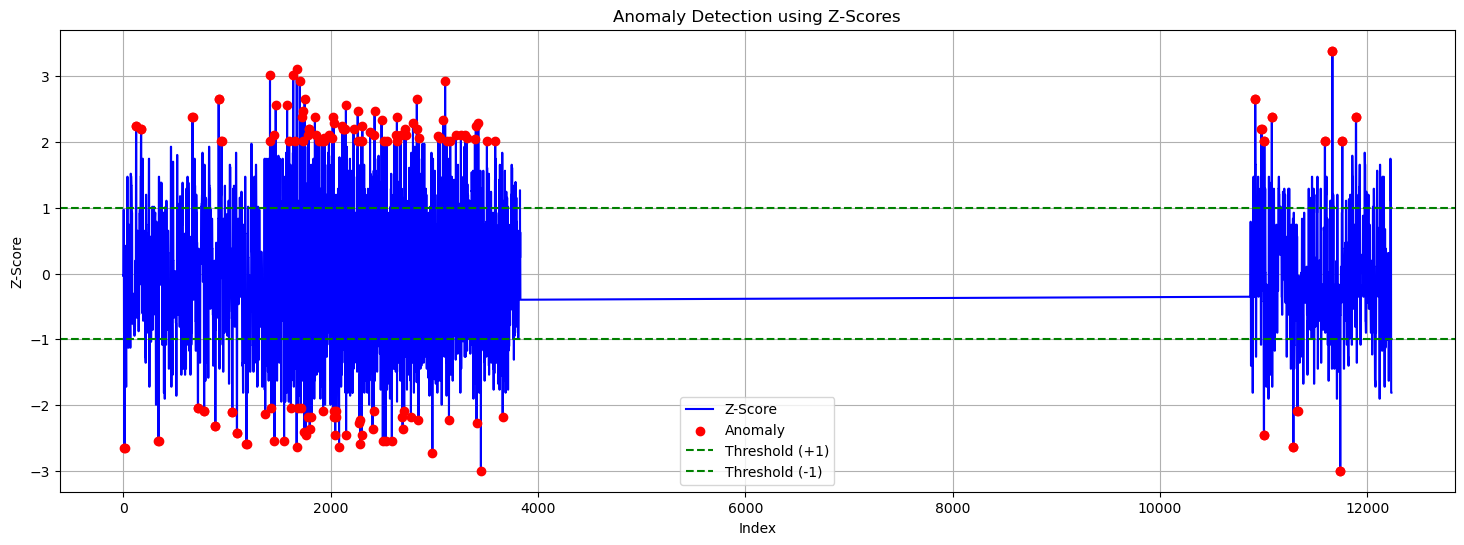

0        0.483527
2        0.483527
4        0.069265
6        0.069265
8        0.595490
           ...   
12223    0.449938
12225    0.886593
12227    0.886593
12229   -1.800514
12231   -1.800514
Name: z_score, Length: 3832, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

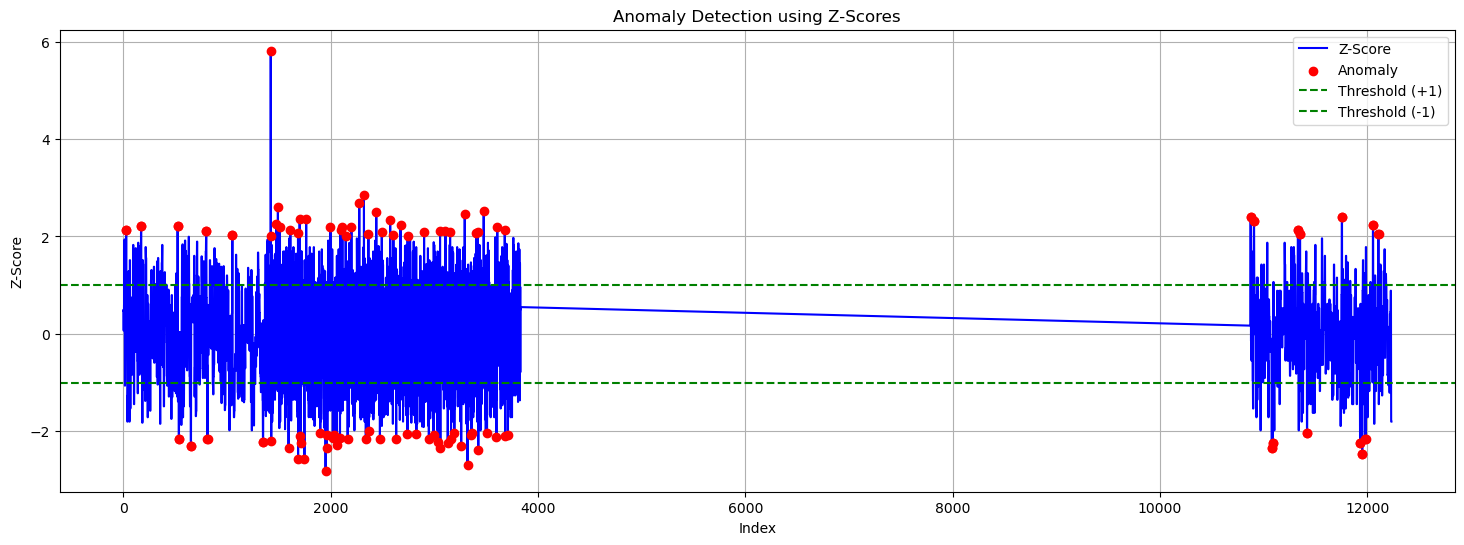

C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

3832    0.415102
3834    0.415102
3836   -1.016201
3838   -1.016201
3840    0.907112
          ...   
9888    0.325645
9890    0.180279
9892    0.180279
9894    0.638743
9896    0.638743
Name: z_score, Length: 3013, dtype: float64


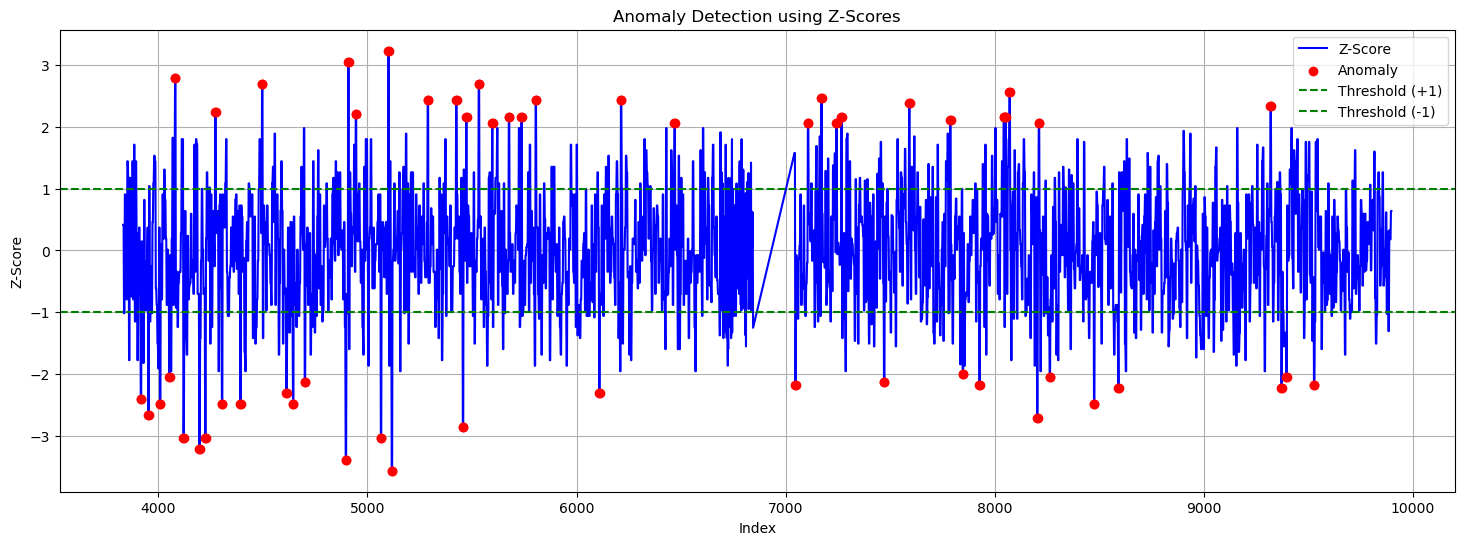

3832   -0.429743
3834   -0.429743
3836    1.395828
3838    1.395828
3840    0.843352
          ...   
9888   -1.402581
9890    0.819332
9892    0.819332
9894    0.483042
9896    0.483042
Name: z_score, Length: 3013, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

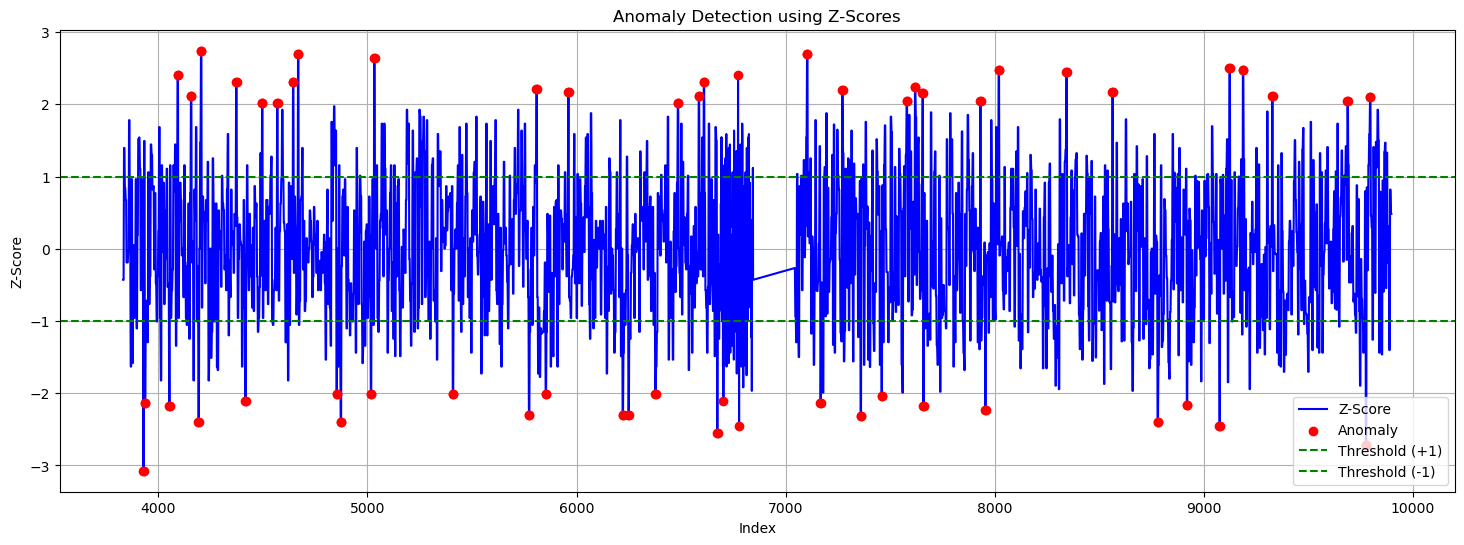

3833    0.409403
3835    0.409403
3837   -1.012461
3839   -1.012461
3841    0.898169
          ...   
9889    0.320536
9891    0.176128
9893    0.176128
9895    0.631569
9897    0.631569
Name: z_score, Length: 3053, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

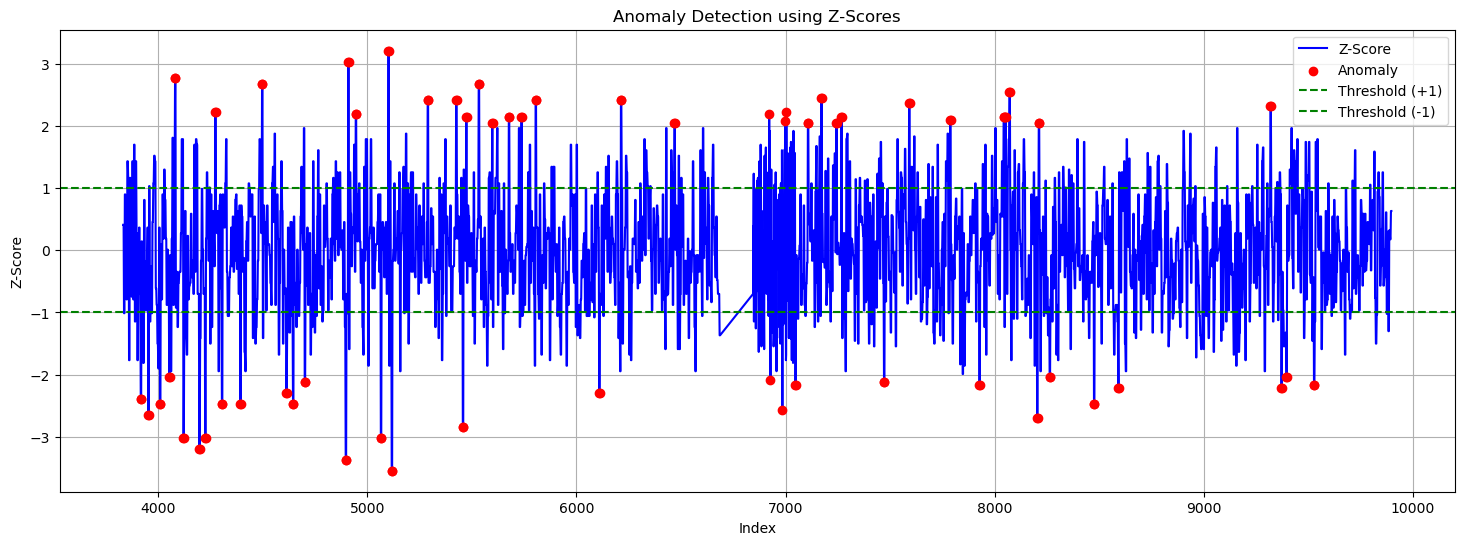

C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)


3833   -0.440443
3835   -0.440443
3837    1.383656
3839    1.383656
3841    0.831626
          ...   
9889   -1.412496
9891    0.807625
9893    0.807625
9895    0.471606
9897    0.471606
Name: z_score, Length: 3053, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score'] = scaler.fit_transform(cleaned_df['z_score'].values.reshape(-1, 1))


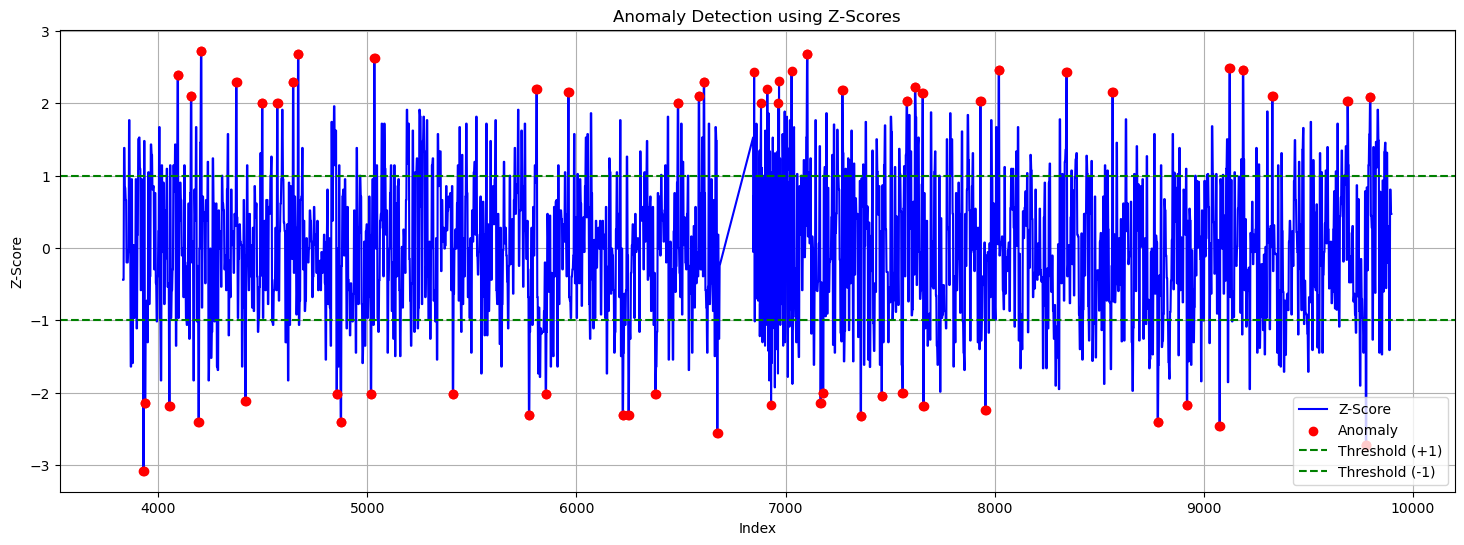

9898     0.400891
9899     0.589632
9900     0.495261
9901     1.108671
9902    -2.005563
           ...   
10690   -1.109041
10691    1.155857
10692    0.589632
10693    0.778374
10694    0.778374
Name: z_score, Length: 797, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

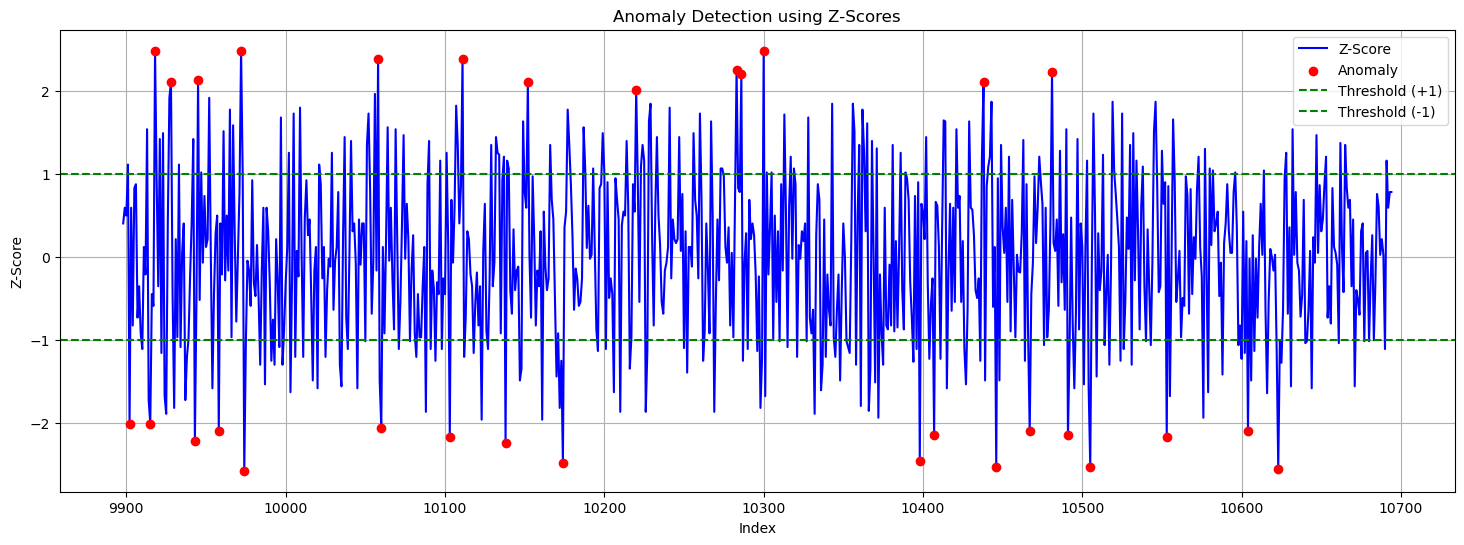

9898     1.779432
9899     1.707057
9900     0.886806
9901     0.886806
9902    -0.488320
           ...   
10690    0.506837
10691   -0.029944
10692   -0.759726
10693   -0.874320
10694   -0.198820
Name: z_score, Length: 797, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

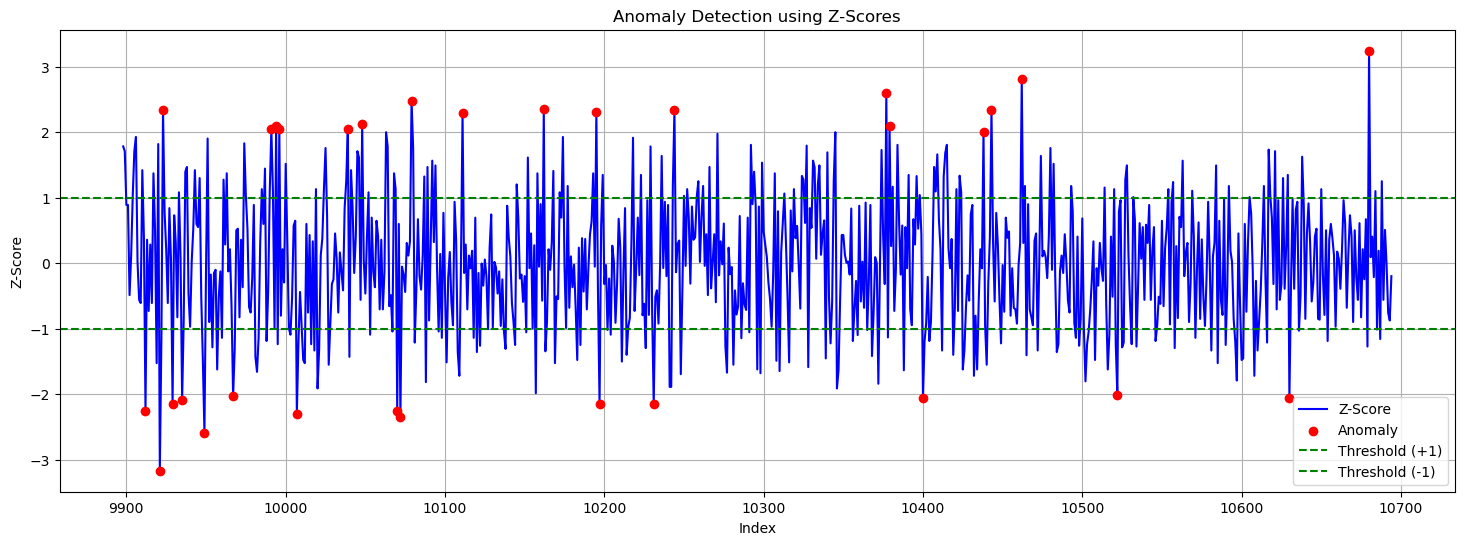

C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

1       -0.030987
3       -0.030987
5        0.959077
7        0.959077
9       -0.886043
           ...   
12224    1.724127
12226    1.094086
12228    1.094086
12230   -1.786101
12232   -1.786101
Name: z_score, Length: 1538, dtype: float64


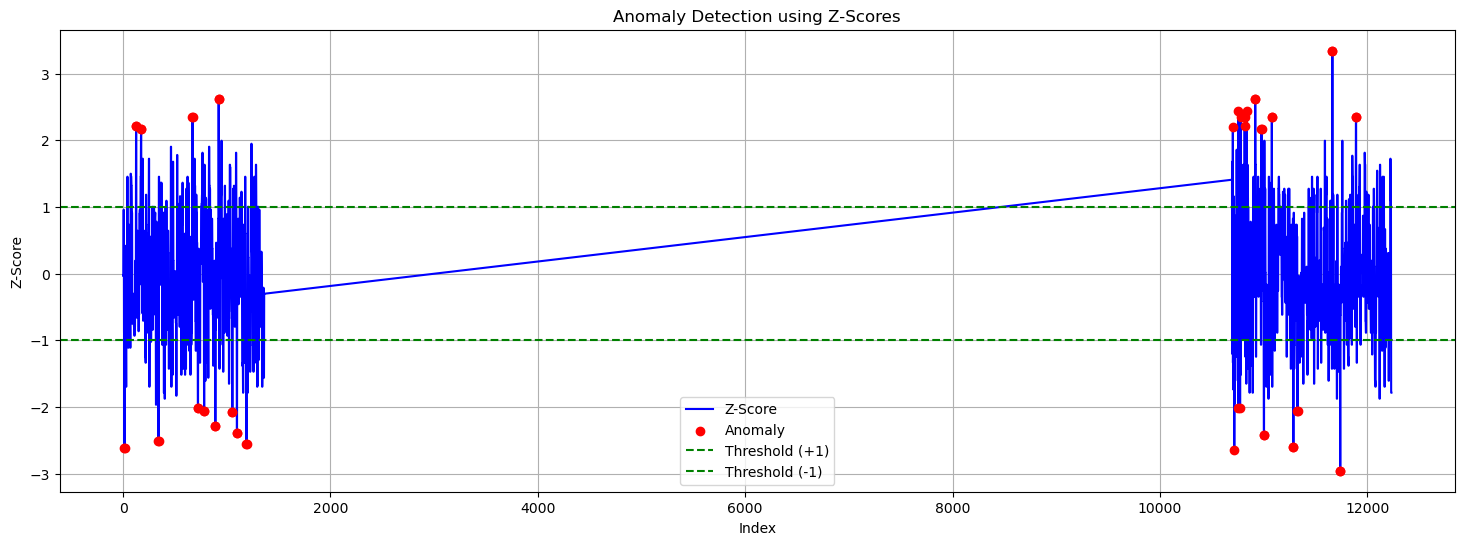

1        0.476228
3        0.476228
5        0.083368
7        0.083368
9        0.582406
           ...   
12224    0.444374
12226    0.858469
12228    0.858469
12230   -1.689806
12232   -1.689806
Name: z_score, Length: 1538, dtype: float64


C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['z_score']=(cleaned_df[f'channel_{channel}_mean']-mean)/std
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['anomaly'] = cleaned_df['z_score'].apply(lambda x: 1 if x > 2 or x < -2 else 0)
C:\Users\93757\AppData\Local\Temp\ipykernel_548\1343002258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy

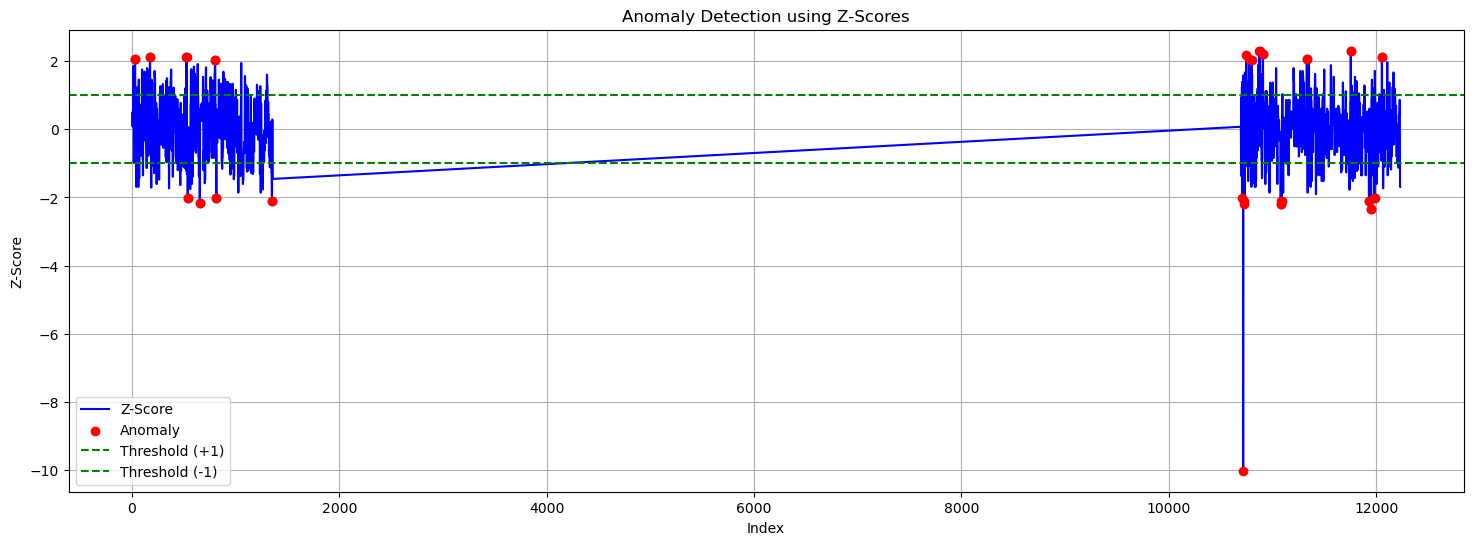

In [ ]:
bearing1_channel_x_fit=anamaly_detection(bearing1_channelx_df,'x')
bearing1_channel_y_fit=anamaly_detection(bearing1_channely_df,'y')

bearing2_channel_x_fit=anamaly_detection(bearing2_channelx_df,'x')
bearing2_channel_y_fit=anamaly_detection(bearing2_channely_df,'y')

bearing3_channel_x_fit=anamaly_detection(bearing3_channelx_df,'x')
bearing3_channel_y_fit=anamaly_detection(bearing3_channely_df,'y')

bearing4_channel_x_fit=anamaly_detection(bearing4_channelx_df,'x')
bearing4_channel_y_fit=anamaly_detection(bearing4_channely_df,'y')

bearing5_channel_x_fit=anamaly_detection(bearing5_channelx_df,'x')
bearing5_channel_y_fit=anamaly_detection(bearing5_channely_df,'y')





In [ ]:
#cluster the z-score based on the number of anomaly within certain range

#calculate the average anomaly for every 500 data points
result_bearing1_x=[]
result_bearing1_y=[]
result_bearing2_x=[]
result_bearing2_y=[]
result_bearing3_x=[]
result_bearing3_y=[]
result_bearing4_x=[]
result_bearing4_y=[]
result_bearing5_x=[]
result_bearing5_y=[]

# for every 20percent of the data points, calculate the average anomaly
for i in range(0, len(bearing1_channel_x_fit), len(bearing1_channel_x_fit)//10):
    result_bearing1_x.append(bearing1_channel_x_fit['anomaly'].iloc[i:i+(len(bearing1_channel_x_fit)//5)].sum())
    result_bearing1_y.append(bearing1_channel_y_fit['anomaly'].iloc[i:i+(len(bearing1_channel_y_fit)//5)].sum())

for i in range(0, len(bearing2_channel_x_fit), len(bearing2_channel_x_fit)//10):
    result_bearing2_x.append(bearing2_channel_x_fit['anomaly'].iloc[i:i+(len(bearing2_channel_x_fit)//5)].sum())
    result_bearing2_y.append(bearing2_channel_y_fit['anomaly'].iloc[i:i+(len(bearing2_channel_y_fit)//5)].sum())

for i in range(0, len(bearing3_channel_x_fit), len(bearing3_channel_x_fit)//10):
    result_bearing3_x.append(bearing3_channel_x_fit['anomaly'].iloc[i:i+(len(bearing3_channel_x_fit)//5)].sum())
    result_bearing3_y.append(bearing3_channel_y_fit['anomaly'].iloc[i:i+(len(bearing3_channel_y_fit)//5)].sum())

for i in range(0, len(bearing4_channel_x_fit), len(bearing4_channel_x_fit)//10):
    result_bearing4_x.append(bearing4_channel_x_fit['anomaly'].iloc[i:i+(len(bearing4_channel_x_fit)//5)].sum())
    result_bearing4_y.append(bearing4_channel_y_fit['anomaly'].iloc[i:i+(len(bearing4_channel_y_fit)//5)].sum())

for i in range(0, len(bearing5_channel_x_fit), len(bearing5_channel_x_fit)//10):
    result_bearing5_x.append(bearing5_channel_x_fit['anomaly'].iloc[i:i+(len(bearing5_channel_x_fit)//5)].sum())
    result_bearing5_y.append(bearing5_channel_y_fit['anomaly'].iloc[i:i+(len(bearing5_channel_y_fit)//5)].sum())





print("Bearing1: X: ",result_bearing1_x, " Y：",result_bearing1_y)
print("Bearing2: X: ",result_bearing2_x, " Y：",result_bearing2_y)
print("Bearing3: X: ",result_bearing3_x, " Y：",result_bearing3_y)
print("Bearing4: X: ",result_bearing4_x, " Y：",result_bearing4_y)
print("Bearing5: X: ",result_bearing5_x, " Y：",result_bearing5_y)

bearing1_channel_x_fit



Bearing1: X:  [30, 44, 49, 44, 36, 28, 21, 22, 24, 10, 0]  Y： [21, 23, 26, 23, 17, 22, 24, 24, 26, 12, 0]
Bearing2: X:  [36, 32, 28, 12, 14, 26, 24, 10, 8, 8, 0]  Y： [34, 18, 12, 23, 25, 26, 18, 14, 18, 8, 0]
Bearing3: X:  [36, 32, 28, 14, 17, 25, 24, 12, 8, 8, 0]  Y： [34, 18, 14, 26, 27, 31, 22, 14, 18, 8, 0]
Bearing4: X:  [9, 4, 7, 6, 4, 5, 8, 6, 3, 1, 0]  Y： [13, 10, 7, 5, 2, 5, 7, 2, 2, 2, 0]
Bearing5: X:  [8, 10, 16, 14, 13, 13, 8, 8, 6, 0, 0]  Y： [8, 10, 6, 8, 13, 9, 6, 4, 10, 8, 0]


,identifier_x,channel_x_mean,channel_x_median,channel_x_std,channel_x_var,channel_x_skew,channel_x_kurtosis,channel_x_rms,channel_x_ptp,channel_x_crest_factor,channel_x_energy,channel_x_entropy,timestamp,z_score,anomaly
0,Bearing1_1,-6.941605e-19,-0.002227,1,1,-0.003932,-0.130810,1,6.716630,3.572381,2559,2.641415,9:39:39,-0.032618,0
2,Bearing1_1,-6.941605e-19,-0.002227,1,1,-0.003932,-0.130810,1,6.716630,3.572381,2559,2.641415,9:39:39,-0.032618,0
4,Bearing1_1,1.457737e-17,0.008098,1,1,-0.026098,-0.085607,1,6.801451,3.588824,2559,2.623753,9:39:49,0.970607,0
6,Bearing1_1,1.457737e-17,0.008098,1,1,-0.026098,-0.085607,1,6.801451,3.588824,2559,2.623753,9:39:49,0.970607,0
8,Bearing1_1,-1.388321e-17,-0.003984,1,1,-0.004590,0.032538,1,6.921668,3.586234,2559,2.608558,9:39:59,-0.899040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12223,Bearing3_1,2.637810e-17,-0.007834,1,1,-0.156593,1.352439,1,10.500592,6.509447,2559,2.020269,10:35:59,1.745826,0
12225,Bearing3_1,1.665985e-17,-0.004075,1,1,0.106189,1.211293,1,10.221445,5.995597,2559,2.059229,10:36:9,1.107410,0
12227,Bearing3_1,1.665985e-17,-0.004075,1,1,0.106189,1.211293,1,10.221445,5.995597,2559,2.059229,10:36:9,1.107410,0
12229,Bearing3_1,-2.776642e-17,-0.019049,1,1,-0.018029,0.520011,1,8.493248,4.601854,2559,2.315358,10:36:19,-1.811062,0


In [21]:
def PCA_DBSCAN(cleaned_df,channel,timestamps,model):

    # Drop all columns with nested lists
    for col in cleaned_df.columns:
        if isinstance(cleaned_df[col].iloc[0], list):
            cleaned_df.drop(col, axis=1, inplace=True)

    # Ensure all remaining columns are numeric (drop any remaining non-numeric columns if necessary)
    cleaned_df = cleaned_df.select_dtypes(include=['float64', 'int64'])


    if model=='pca':
        # #normalize the data
        # scaler = StandardScaler()
        # cleaned_df = scaler.fit_transform(cleaned_df)
        pca = PCA(n_components=3)
        X_reduced = pca.fit_transform(cleaned_df)
        print(pca.explained_variance_ratio_)
        
        dbscan = DBSCAN(eps=1, min_samples=6)
        clusters = dbscan.fit_predict(X_reduced)
        df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
        df_pca['Cluster'] = clusters
        df_pca['timestamp'] = timestamps
        print(df_pca['Cluster'].value_counts())

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='Cluster', palette='viridis')
        plt.title(f'DBSCAN Clustering of Channel-{channel} PCA-Reduced Data')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()
    
    elif model=='default':
        # #normalize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(cleaned_df)
        cleaned_df = pd.DataFrame(scaled_data, columns=cleaned_df.columns)
        dbscan = DBSCAN(eps=0.7, min_samples=6)
        clusters = dbscan.fit_predict(cleaned_df)
        display(clusters)
        cleaned_df['Cluster'] = clusters
        cleaned_df['timestamp'] = timestamps
        print(cleaned_df['Cluster'].value_counts())

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='timestamp',y='Cluster', data=cleaned_df, hue='Cluster', palette='viridis')
        plt.title(f'DBSCAN Clustering of Channel-{channel} Data')
        plt.ylabel(f'channel_{channel}_mean')
        plt.xlabel('Timestamp')
        plt.show()


In [18]:
display(bearing1_channelx_df.head())

,channel_x_fft_mean,channel_x_fft_std,channel_x_fft_max,channel_x_spectral_centroid,channel_x_spectral_bandwidth,channel_x_cepstrum_mean,channel_x_cepstrum_std,timestamp
0,29.505197,41.101061,497.026839,4388.330023,2681.642973,0.032811,0.154004,9:39:39
1,30.854258,40.097454,305.159837,4259.868719,2703.741255,0.033899,0.156634,9:39:49
2,30.385870,40.454975,373.381919,4389.800799,2772.166541,0.032697,0.156495,9:39:59
3,30.231766,40.571211,426.903378,4370.578450,2747.162223,0.033112,0.156372,9:40:9
4,29.991219,40.745158,440.312822,4383.481446,2749.157823,0.033293,0.157049,9:40:19


array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

Cluster
 2    2577
-1     187
 0      22
 3      10
 1       7
Name: count, dtype: int64


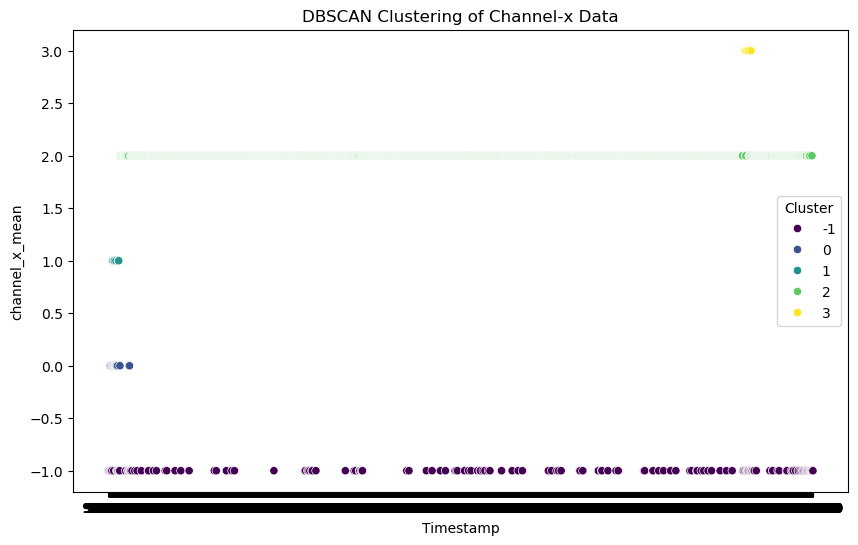

array([ 0, -1,  0, ..., -1, -1, -1], dtype=int64)

Cluster
 0    2351
-1     447
 1       5
Name: count, dtype: int64


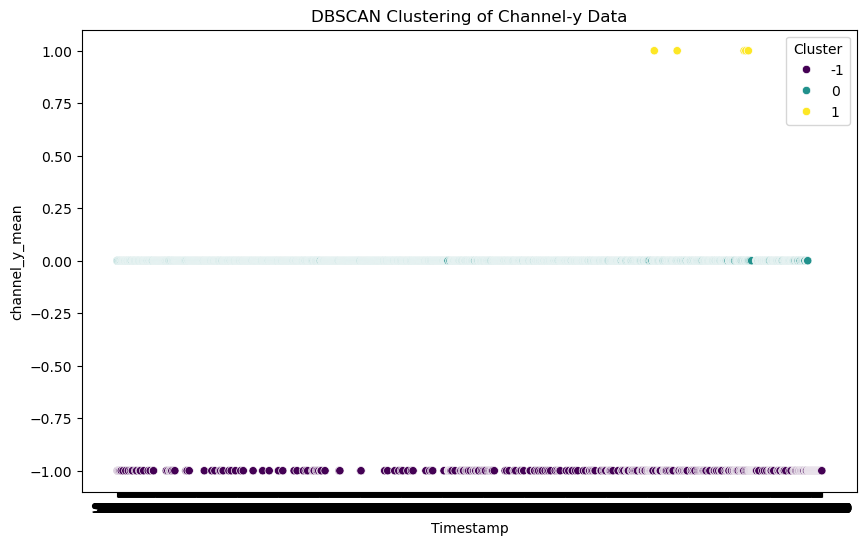

[0.69355272 0.29823494 0.00820529]
Cluster
-1    2803
Name: count, dtype: int64


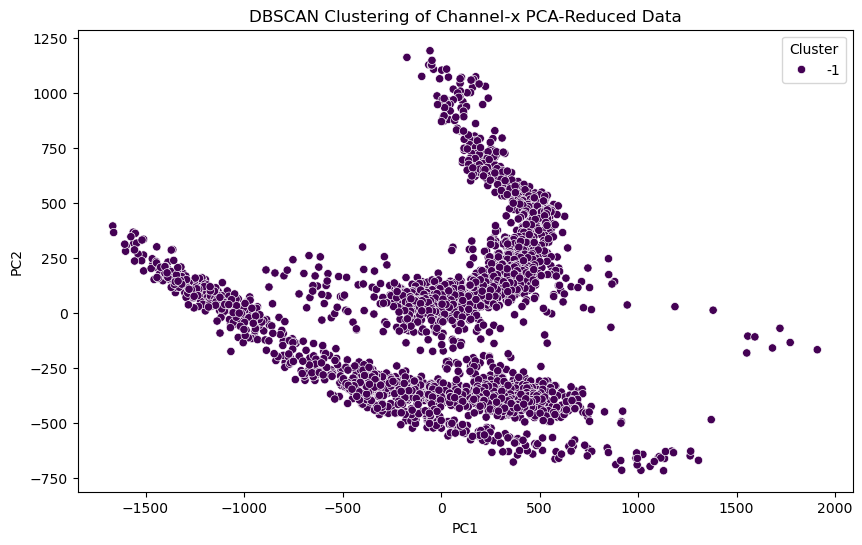

[0.90328276 0.09176551 0.00494316]
Cluster
-1    2803
Name: count, dtype: int64


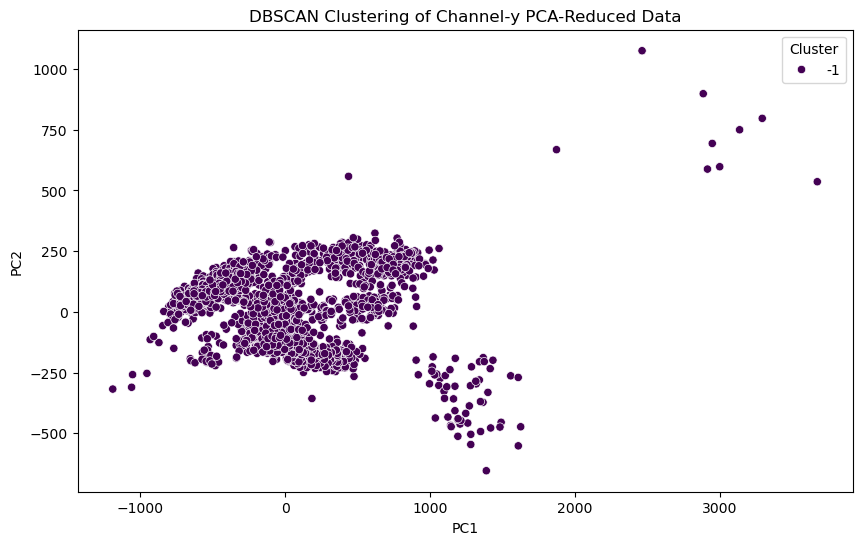

In [22]:
PCA_DBSCAN(bearing1_channelx_df, "x", bearing1_timestamps,'default')
PCA_DBSCAN(bearing1_channely_df, "y", bearing1_timestamps,'default')

PCA_DBSCAN(bearing1_channelx_df, "x", bearing1_timestamps,'pca')
PCA_DBSCAN(bearing1_channely_df, "y", bearing1_timestamps,'pca')

Cluster
 0    2386
-1     475
 1      48
 3      42
 8      20
 2      12
 5      10
 7       8
 4       6
 6       6
Name: count, dtype: int64


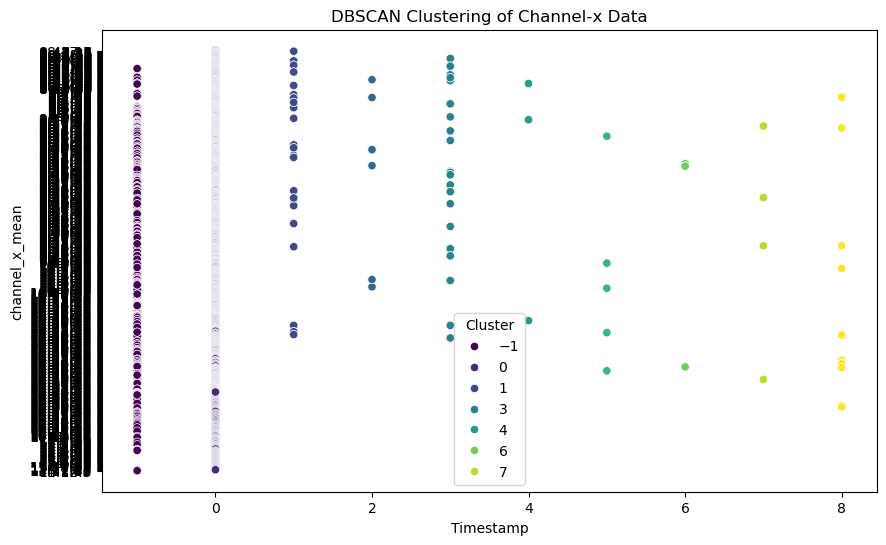

C:\Users\93757\AppData\Local\Temp\ipykernel_548\3090850091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(col, axis=1, inplace=True)


Cluster
 0    2249
-1     641
 2      55
 1      42
 4      10
 5       8
 3       8
Name: count, dtype: int64


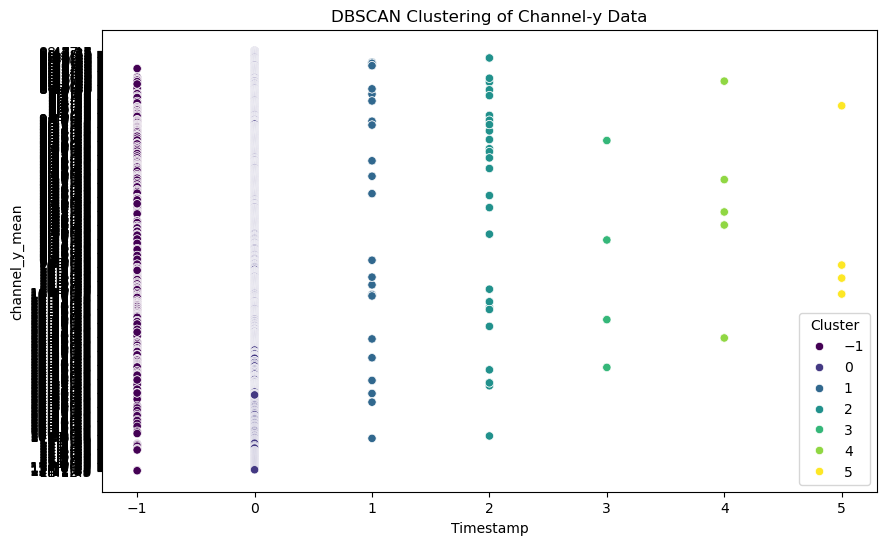

[0.96997759 0.02658599 0.00264708]
Cluster
 0     2520
-1      333
 5       44
 1       36
 2       12
 4       10
 7        8
 10       8
 3        6
 13       6
 6        6
 12       6
 8        6
 9        6
 11       6
Name: count, dtype: int64


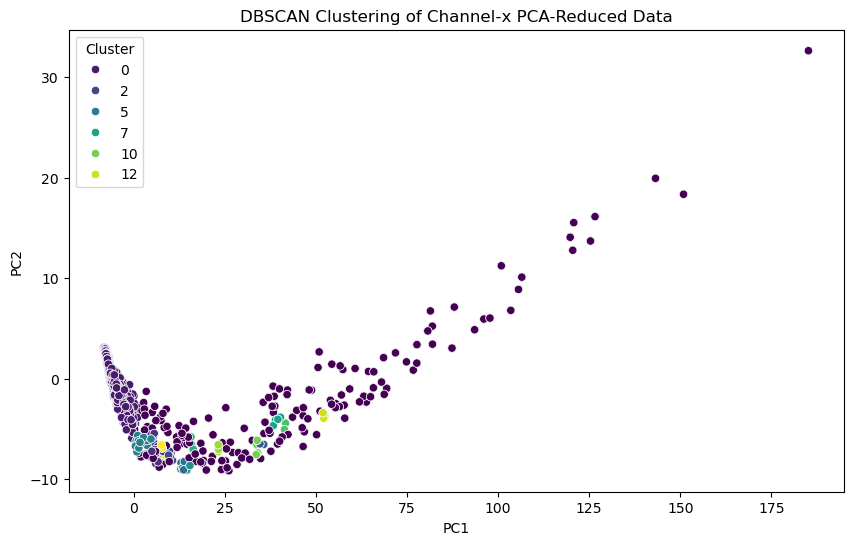

[9.93572355e-01 5.66885646e-03 3.64218456e-04]
Cluster
 0    2391
-1     542
 1      22
 2      16
 3      12
 7       9
 5       8
 6       7
 4       6
Name: count, dtype: int64


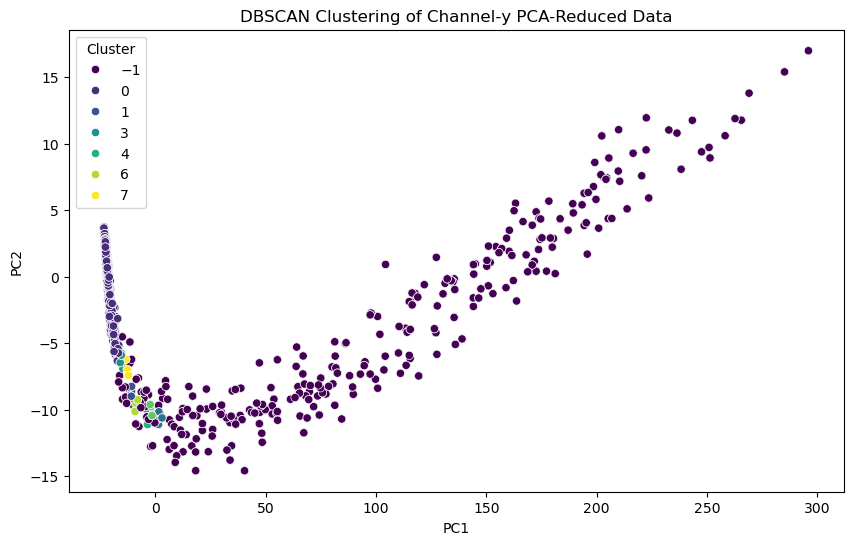

In [ ]:
PCA_DBSCAN(bearing2_channelx_df, "x", bearing2_timestamps,'default')
PCA_DBSCAN(bearing2_channely_df, "y", bearing2_timestamps,'default')

PCA_DBSCAN(bearing2_channelx_df, "x", bearing2_timestamps,'pca')
PCA_DBSCAN(bearing2_channely_df, "y", bearing2_timestamps,'pca')

Cluster
 0     2421
-1      447
 1       52
 3       45
 8       22
 5       18
 2       12
 6       10
 9        8
 4        6
 10       6
 7        6
Name: count, dtype: int64


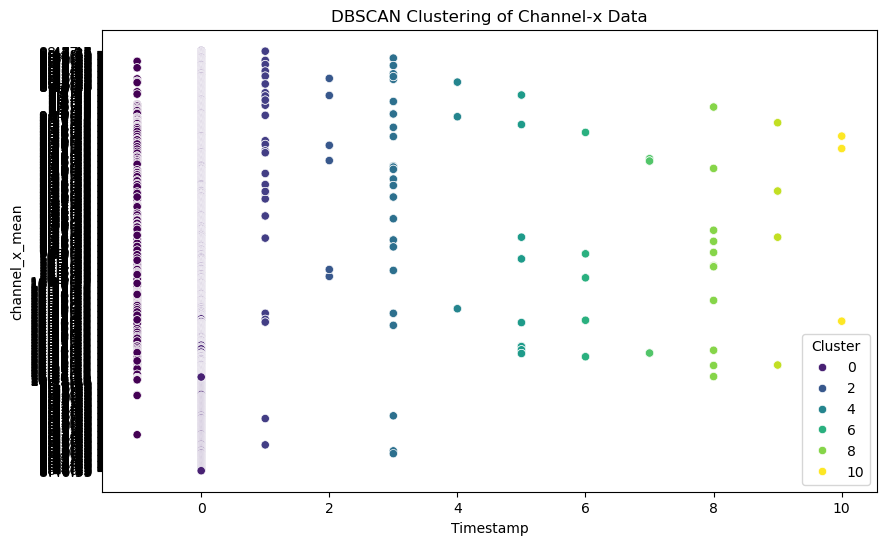

C:\Users\93757\AppData\Local\Temp\ipykernel_548\3090850091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(col, axis=1, inplace=True)


Cluster
 0    2302
-1     623
 2      58
 1      44
 4      10
 5       8
 3       8
Name: count, dtype: int64


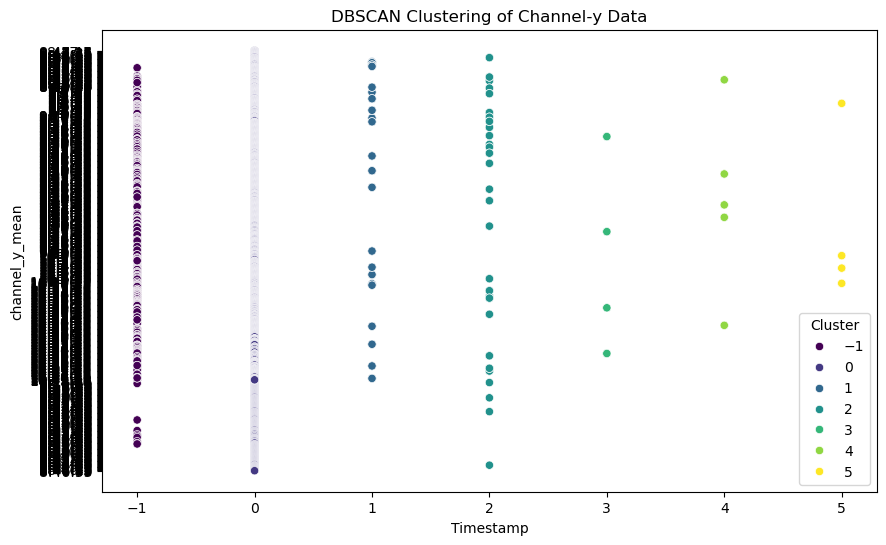

[0.97033059 0.02623334 0.00266664]
Cluster
 0     2578
-1      316
 5       36
 1       34
 2       12
 4       10
 14       9
 8        8
 12       8
 3        6
 6        6
 7        6
 13       6
 9        6
 10       6
 11       6
Name: count, dtype: int64


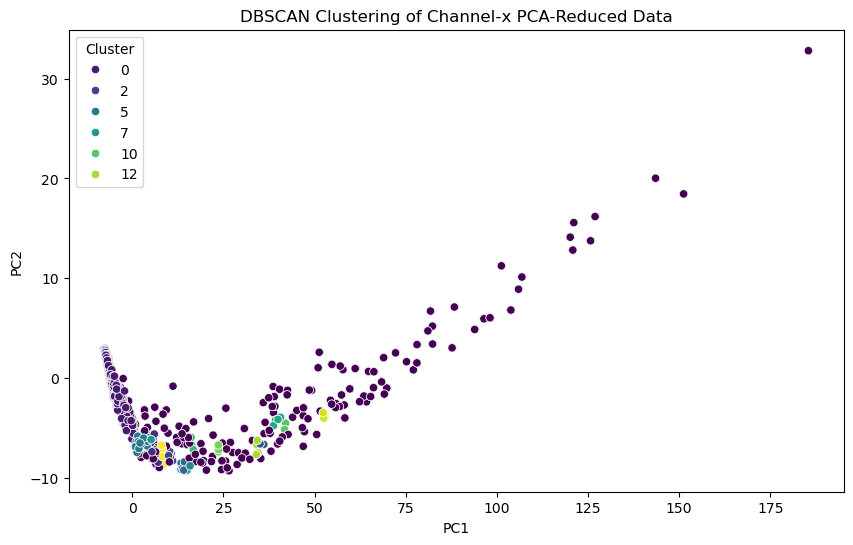

[9.93637190e-01 5.59952702e-03 3.60405257e-04]
Cluster
 0    2448
-1     535
 1      22
 2      14
 5       8
 7       8
 4       6
 3       6
 6       6
Name: count, dtype: int64


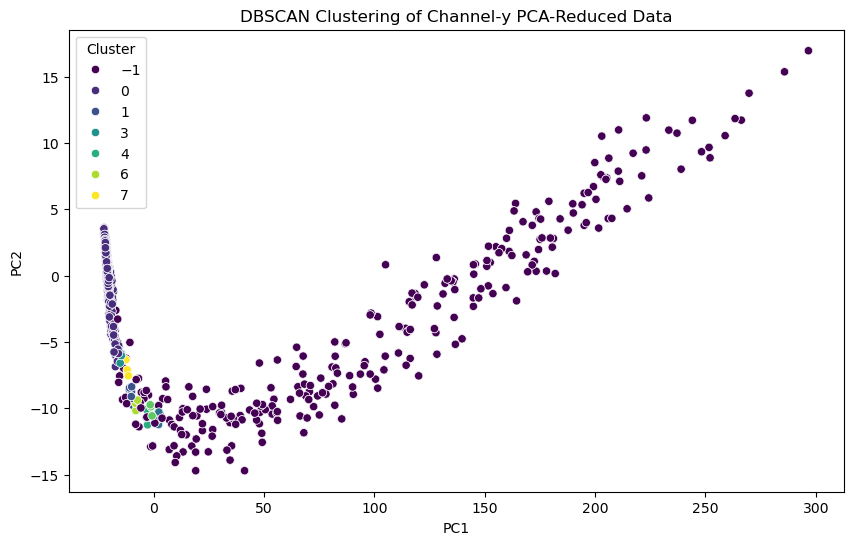

In [ ]:
PCA_DBSCAN(bearing3_channelx_df, "x", bearing3_timestamps,'default')
PCA_DBSCAN(bearing3_channely_df, "y", bearing3_timestamps,'default')

PCA_DBSCAN(bearing3_channelx_df, "x", bearing3_timestamps,'pca')
PCA_DBSCAN(bearing3_channely_df, "y", bearing3_timestamps,'pca')

Cluster
 0    722
 3     27
 1     18
-1     17
 2     13
Name: count, dtype: int64


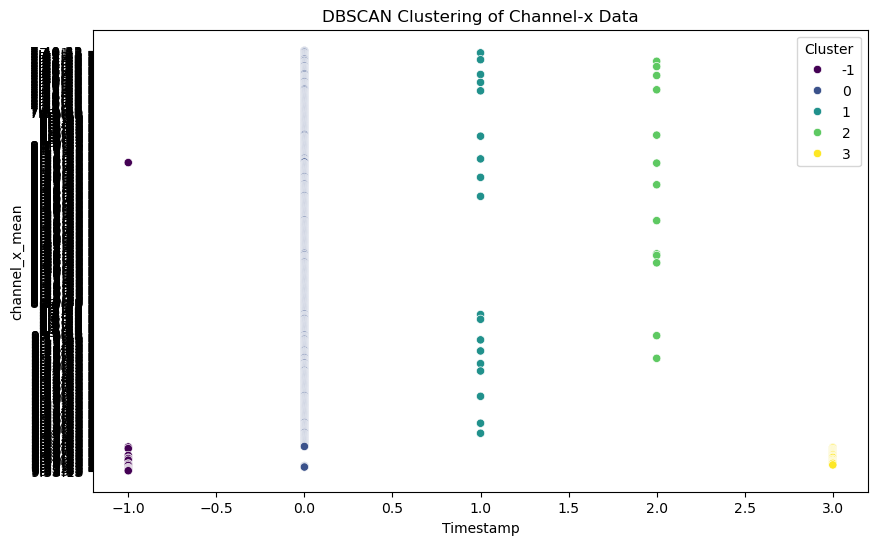

C:\Users\93757\AppData\Local\Temp\ipykernel_548\3090850091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(col, axis=1, inplace=True)


Cluster
 0    751
-1     18
 2     14
 1     14
Name: count, dtype: int64


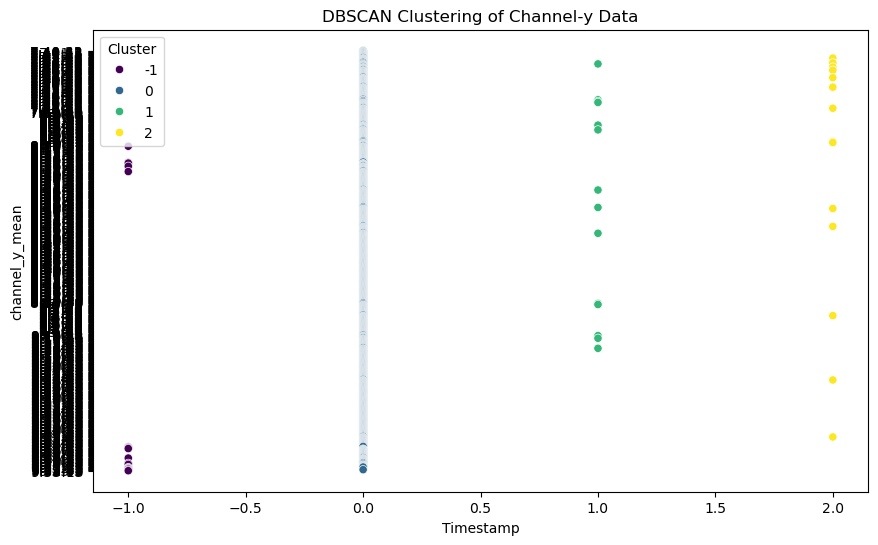

[0.79509622 0.13130896 0.06254145]
Cluster
 0    753
 1     31
-1     13
Name: count, dtype: int64


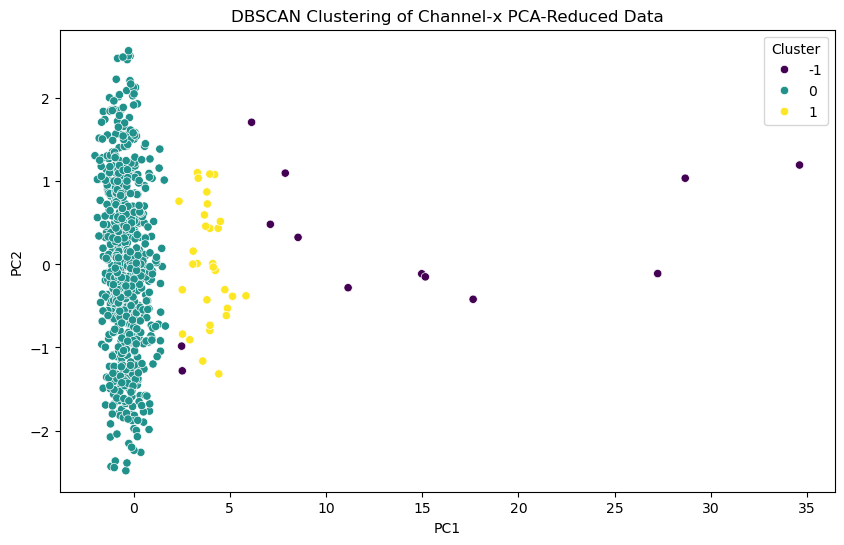

[0.7695026  0.14133279 0.08146496]
Cluster
 0    782
-1     15
Name: count, dtype: int64


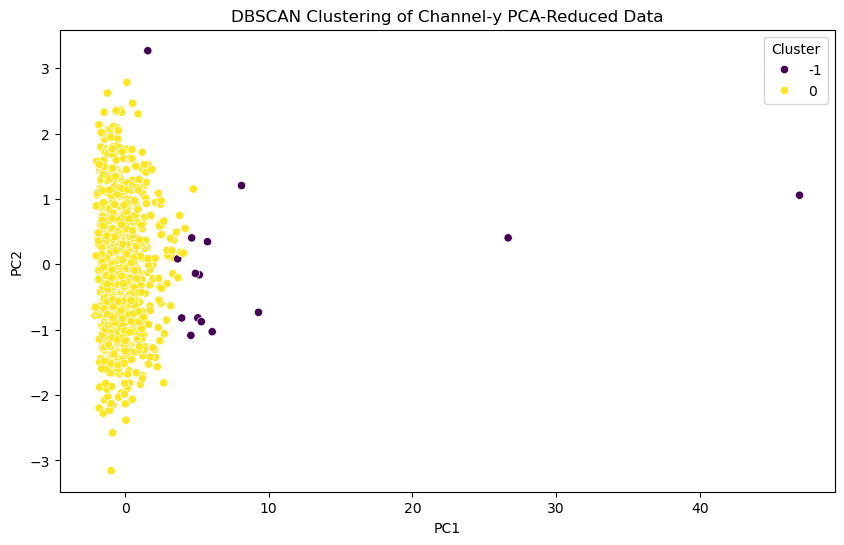

In [ ]:
PCA_DBSCAN(bearing4_channelx_df, "x", bearing4_timestamps,'default')
PCA_DBSCAN(bearing4_channely_df, "y", bearing4_timestamps,'default')

PCA_DBSCAN(bearing4_channelx_df, "x", bearing4_timestamps,'pca')
PCA_DBSCAN(bearing4_channely_df, "y", bearing4_timestamps,'pca')

Cluster
 0    1430
-1      44
 1      22
 4      17
 3      13
 2      12
Name: count, dtype: int64


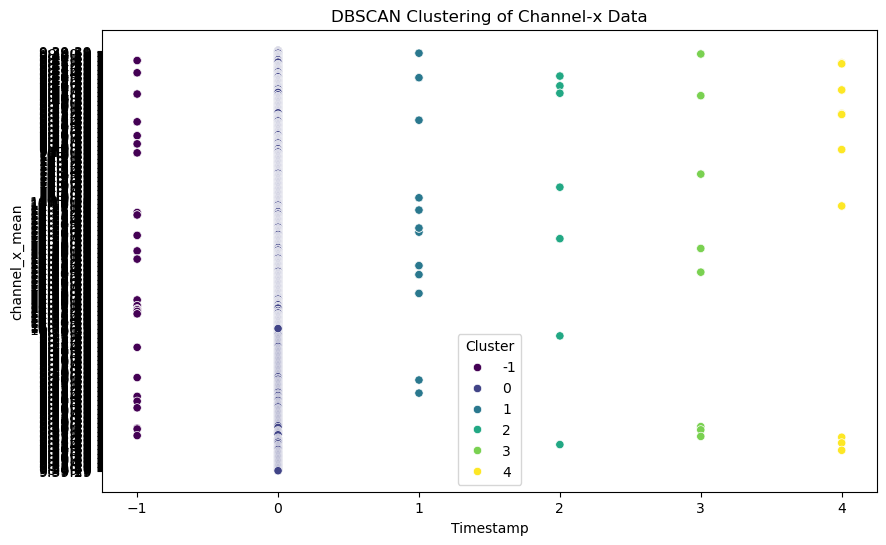

C:\Users\93757\AppData\Local\Temp\ipykernel_548\3090850091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(col, axis=1, inplace=True)


Cluster
 0    1443
-1      30
 1      21
 2      17
 4      15
 3      12
Name: count, dtype: int64


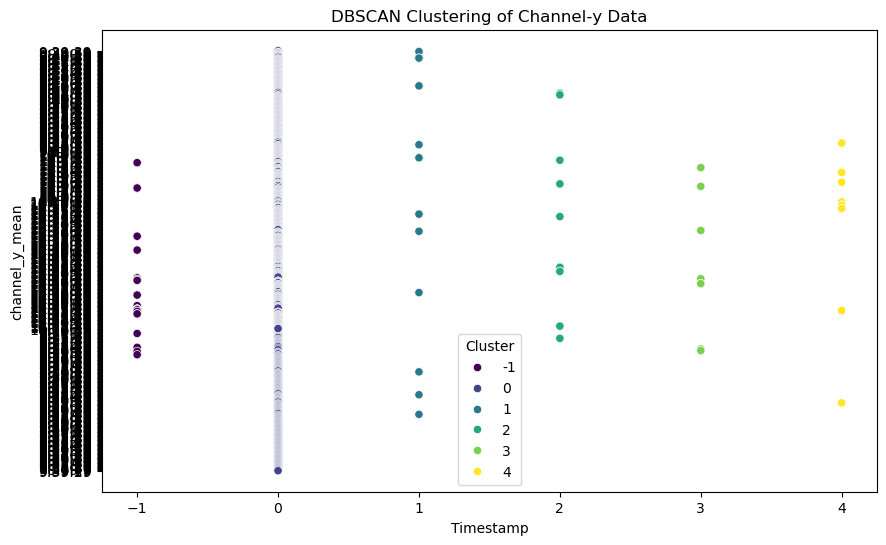

[0.98447712 0.01207445 0.00299961]
Cluster
 0    1516
-1      22
Name: count, dtype: int64


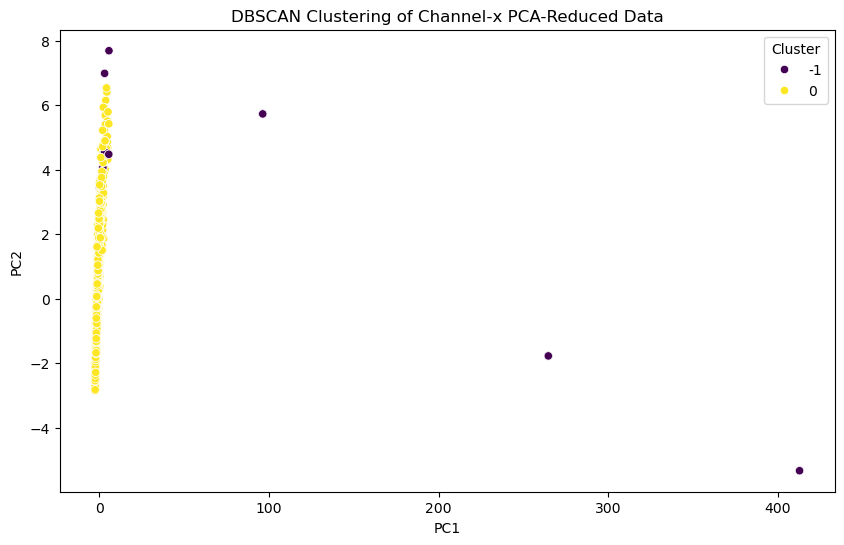

[0.90675561 0.06121082 0.02977529]
Cluster
 0    1506
-1      19
 1      13
Name: count, dtype: int64


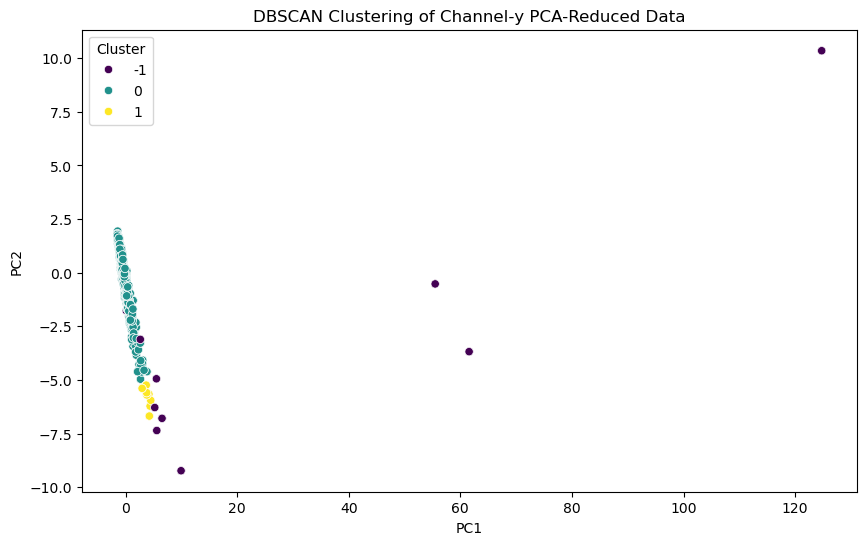

In [ ]:

PCA_DBSCAN(bearing5_channelx_df, "x", bearing5_timestamps,'default')
PCA_DBSCAN(bearing5_channely_df, "y", bearing5_timestamps,'default')

PCA_DBSCAN(bearing5_channelx_df, "x", bearing5_timestamps,'pca')
PCA_DBSCAN(bearing5_channely_df, "y", bearing5_timestamps,'pca')